# Damped Oscillation
## Created RW, 4.1.20
## Revision: 28.1.21
## Status: works

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import root
import scipy.constants as co

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 8,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

#%matplotlib inline - Figures are shown as static png images (optionally svg if configured)
%matplotlib notebook 
#or %matplotlib nbagg - Interactive Figures inside the notebook
# %matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)
#%matplotlib tk or 
#%matplotlib qt 
# etc. - GUI windows show the figure externally to the notebook with the given interactive backend

import matplotlib.pyplot as plt


## Weak damping $\omega_0>\kappa$

<IPython.core.display.Javascript object>


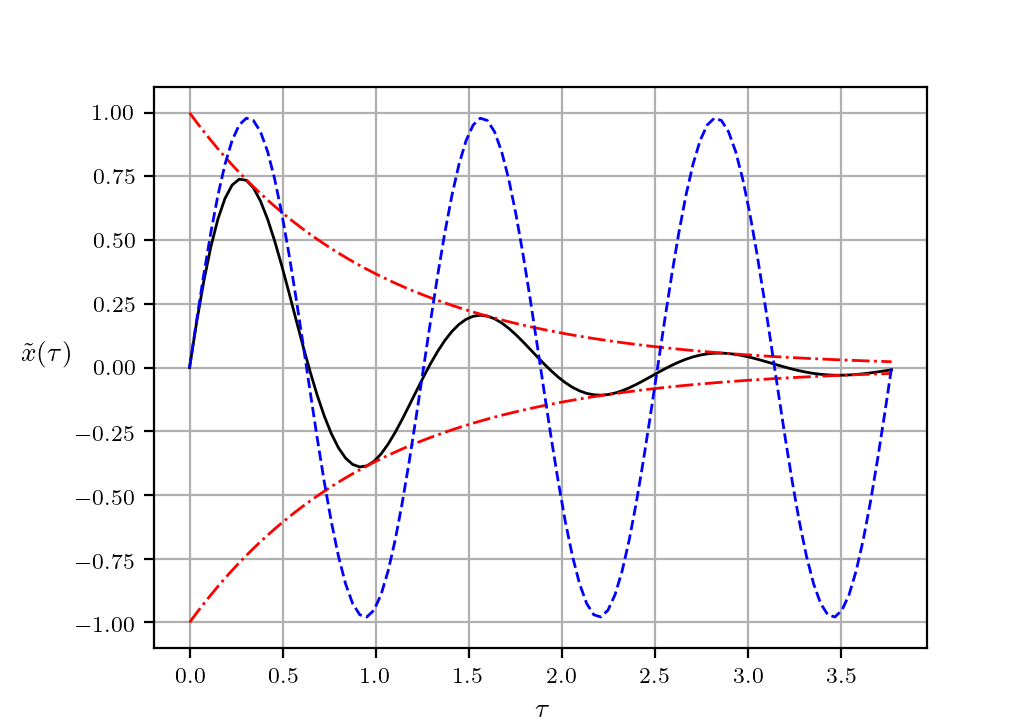

In [2]:
kappa=1.0
omega0=5.0
omega=np.sqrt(omega0**2-kappa**2)

x0=0.0
v0=omega

p1=omega/kappa

numberoftimesteps=100

t=np.linspace(0,3*2*np.pi/omega0,numberoftimesteps )

# choose latex document textwidth for landscape pictures
fig = plt.figure(figsize=(5.1483,5.1483/np.sqrt(2.0)))


#######################################################################
ax = fig.add_subplot(1,1,1) #, aspect=1)

x=np.exp(-kappa*t)*(x0*np.cos(omega*t)+(v0+kappa*x0)/omega*np.sin(omega*t))
xe=np.exp(-kappa*t)*(x0+(v0+kappa*x0)/omega)
xu=x0*np.cos(omega0*t)+(v0)/omega0*np.sin(omega0*t)

#label1="$x_0={0:6.0f}$, $v_{{x0}}={1:6.0f}$, $y_0={2:6.0f}$, $v_{{y0}}={3:6.0f}$".format(x0,vx0,y0,vy0)
ax.plot(t,x,'k-',lw=1)
ax.plot(t,-xe,'r-.',t,xe,'r-.',lw=1)
ax.plot(t,xu,'b--',lw=1)


#title="$\omega_x:\omega_y={0:6.0f}:{1:6.0f}$".format(omegax,omegay)
#ax.set_title(title)
ax.set_xlabel(r'$\tau$',fontsize='large')
ax.set_ylabel(r'$\tilde{x}(\tau)$',fontsize='large',rotation='horizontal',labelpad=10)
#ax.set_xlim(xmin=-1.5,xmax=1.5)
#ax.set_ylim(ymin=-1.5,ymax=1.5)

ax.grid()
#ax.legend((label1,label2,label2),loc='lower center')
#fig.tight_layout()
# ax.text(-0.9, 0.8, "a)")


#######################################################################################
#left = 0.2  # the left side of the subplots of the figure
#right = 0.1  # the right side of the subplots of the figure
#bottom = 0.08  # the bottom of the subplots of the figure
#top = 0.1   # the top of the subplots of the figure
#wspace = 0.1  # the amount of width reserved for space between subplots,
#              # expressed as a fraction of the average axis width
#hspace = 0.1  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

plt.subplots_adjust(left=.15)
#######################################################################################
plt.show();

plt.savefig('pictures/damped_oscillation_weak.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/damped_oscillation_weak.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


## Strong damping $\kappa>\omega_0$ 

<IPython.core.display.Javascript object>


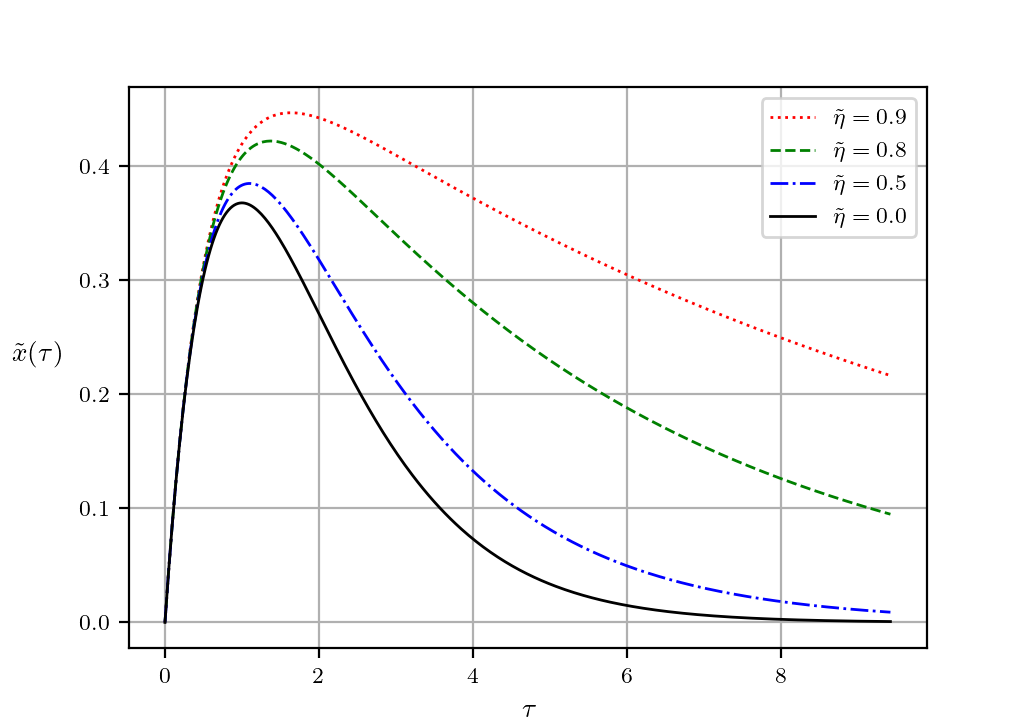

In [3]:
#omega0=5.0

numberoftimesteps=400

t=np.linspace(0,3*np.pi,numberoftimesteps )

# choose latex document textwidth for landscape pictures
fig = plt.figure(figsize=(5.1483,5.1483/np.sqrt(2.0)))

#######################################################################
ax = fig.add_subplot(1,1,1) #, aspect=1)

eta=0.9
x=np.exp(-t)*np.sinh(eta*t)/eta
ax.plot(t,x,'r',linestyle='dotted',lw=1)

eta=0.8
x=np.exp(-t)*np.sinh(eta*t)/eta
ax.plot(t,x,'g--',lw=1)

eta=0.5
x=np.exp(-t)*np.sinh(eta*t)/eta
ax.plot(t,x,'b-.',lw=1)

xgrenz=np.exp(-t)*t

ax.plot(t,xgrenz,'k-',lw=1)
#title="$\omega_x:\omega_y={0:6.0f}:{1:6.0f}$".format(omegax,omegay)
#ax.set_title(title)
ax.set_xlabel(r'$\tau$',fontsize='large')
ax.set_ylabel(r'$\tilde{x}(\tau)$',fontsize='large',rotation='horizontal',labelpad=15)
#ax.set_xlim(xmin=-1.5,xmax=1.5)
#ax.set_ylim(ymin=-1.5,ymax=1.5)
ax.grid()

ax.legend([r'$\tilde\eta={0:6.1f}$'.format(0.9),
           r'$\tilde\eta={0:6.1f}$'.format(0.8),
           r'$\tilde\eta={0:6.1f}$'.format(0.5),
           r'$\tilde\eta={0:6.1f}$'.format(0)],
          loc='upper right')

#fig.tight_layout()
# ax.text(-0.9, 0.8, "a)")

#######################################################################################
#left = 0.2  # the left side of the subplots of the figure
#right = 0.1  # the right side of the subplots of the figure
#bottom = 0.08  # the bottom of the subplots of the figure
#top = 0.1   # the top of the subplots of the figure
#wspace = 0.1  # the amount of width reserved for space between subplots,
#              # expressed as a fraction of the average axis width
#hspace = 0.1  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

#plt.subplots_adjust(left=.1,wspace=0.3,hspace=.8)
#######################################################################################
plt.show();

plt.savefig('pictures/damped_oscillation_strong.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/damped_oscillation_strong.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
